#Laboratorio 3
Nombre: Jhamil Crespo Rejas

Carrera: Ingenieria en Ciencias de la Computacion

##Carga de datos y de librerias


Conectamos con el drive para poder acceder a los archivos

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos las librerias necesarias para trabajar con los datos

In [44]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

Cargamos el dataset. En este caso utilizamos un dataset que contiene informacion sobre los 784 pixeles de una foto de una letra en el lenguaje de señas. Por lo tanto el dataset contiene 784 caracteristicas (784 pixeles) y la Y tiene 25 clases que corresponden a las letras del alfabeto en ingles.



In [45]:
# La entrada es de 785 elementos contando con x0
input_layer_size  = 785

# 25 etiquetas, de 0 a 24
num_labels = 25

#  datos de entrenamiento almacenados en los arreglos X, y
data = np.loadtxt('/content/drive/MyDrive/sign_mnist_train(preparado).csv', delimiter=',')
X = data[:, 1:]
y = data[:, 0]

m = y.size

In [46]:
print(X[0,:])
print(y)
print(X.shape)

[107. 118. 127. 134. 139. 143. 146. 150. 153. 156. 158. 160. 163. 165.
 159. 166. 168. 170. 170. 171. 171. 171. 172. 171. 171. 170. 170. 169.
 111. 121. 129. 135. 141. 144. 148. 151. 154. 157. 160. 163. 164. 170.
 119. 152. 171. 171. 170. 171. 172. 172. 172. 172. 172. 171. 171. 170.
 113. 123. 131. 137. 142. 145. 150. 152. 155. 158. 161. 163. 164. 172.
 105. 142. 170. 171. 171. 171. 172. 172. 173. 173. 172. 171. 171. 171.
 116. 125. 133. 139. 143. 146. 151. 153. 156. 159. 162. 163. 167. 167.
  95. 144. 171. 172. 172. 172. 172. 172. 173. 173. 173. 172. 172. 171.
 117. 126. 134. 140. 145. 149. 153. 156. 158. 161. 163. 164. 175. 156.
  87. 154. 172. 173. 173. 173. 173. 173. 174. 174. 174. 173. 172. 172.
 119. 128. 136. 142. 146. 150. 153. 156. 159. 163. 165. 164. 184. 148.
  89. 164. 172. 174. 174. 174. 174. 175. 175. 174. 175. 174. 173. 173.
 122. 130. 138. 143. 147. 150. 154. 158. 162. 165. 166. 172. 181. 128.
  94. 170. 173. 175. 174. 175. 176. 177. 177. 177. 177. 175. 175. 174.
 122. 

Definimos la funcion para normalizar los elementos de la matriz X y luego se llama a la misma

In [47]:
def  featureNormalize(X):
    X_norm = X.copy() #Crea una copia de X
    mu = np.zeros(X.shape[1]) #crea un vector de ceros para inicializar mu
    sigma = np.zeros(X.shape[1]) #inicializa sigma con ceros

    mu = np.mean(X, axis = 0) #calcula la media
    sigma = np.std(X, axis = 0) #calcula la desviacion estandar
    X_norm = (X - mu) / sigma #normaliza cada caracteristica en X

    return X_norm, mu, sigma #devuelve X normalizada, la media y la desviacion estandar

In [48]:
# llama a featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [49]:
X = X_norm

Definimos la funcion sigmoid para transformar valores al rango (0, 1) para calcular probabilidades

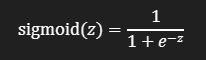

In [50]:
def sigmoid(z):
  #devuelve la sigmoide de z
    return 1.0 / (1.0 + np.exp(-z))

Definimos la funcion que calcula el costo y el gradiente

La función de costo J para la regresión logística sin regularizacion se define como:
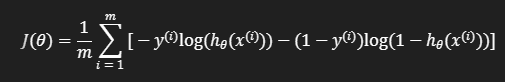

El gradiente de la funcion de costo sin regularizacion se define como:

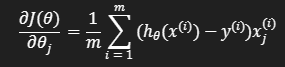



In [51]:
def lrCostFunctionSinRegularizar(theta, X, y):
    # Inicializa m con la longitud de y
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)
    #inicializa el costo y el gradiente
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T)) #calcula las hipotesis

    #calculamos la funcion de costo
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    #calcula el gradiente
    grad = (1 / m) * (h - y).dot(X)

    return J, grad


Definimos la funcion oneVsAll que entrena un clasificador de regresion logistica para cada clase. Esta funcion nos devuelve all_theta donde cada fila correspondera a los parametros entrenados para una etiqueta especifica

In [52]:
def oneVsAll(X, y, num_labels):
    # inicializa m y n con la cantidad de filas y columnas de X
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1)) #inicializa all_theta

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels): #para cada clase
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50} #cantidad de iteraciones
        res = optimize.minimize(lrCostFunctionSinRegularizar,
                                initial_theta,
                                (X, (y == c)),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [53]:
#lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels)
print(all_theta.shape)

<ipython-input-51-81131fddb248>:15: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


(25, 785)


In [54]:
print(all_theta)

[[-1.07273673e+01  4.41389787e-01  3.61956542e-01 ... -1.56633726e-01
  -2.22130905e-01 -2.13798882e-01]
 [-9.29687191e+00  8.11774950e-02 -8.87929519e-02 ...  1.01951903e-01
  -1.14673625e-02 -2.51182249e-01]
 [-6.33502416e+00  2.52994630e-02 -1.13919568e-04 ...  6.40582016e-02
   1.51060760e-01  1.64565618e-01]
 ...
 [-5.92080282e+00 -4.17674208e-02 -1.72686055e-02 ...  1.03427475e-01
   8.61551757e-02 -8.21045130e-02]
 [-5.89588590e+00  1.08613060e-01  1.99417396e-01 ... -1.41175232e-01
  -6.82955517e-02  6.58210288e-02]
 [-5.78692339e+00  6.32431421e-02  6.99191164e-02 ... -4.07390025e-02
  -1.15782383e-01 -3.27901646e-02]]


Definimos la funcion que realiza las predicciones

In [55]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]; #cantidad de ejemplos
    num_labels = all_theta.shape[0] #cantidad de clases

    p = np.zeros(m)

    # Adiciona unos a X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)#adiciona la columna de unos
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1) #Realiza las predicciones

    return p

Realizamos una prueba de prediccion


In [56]:
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))

XPrueba = X[10:150, :].copy()
XPrueba = np.concatenate([np.ones((140, 1)), XPrueba], axis=1)

p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

print(y[10:150])
print(np.mean(p == y[10:150])*100) #indica que tan parecidos son los elementos de la prediccion y de los que deberia salir

Precision del conjuto de entrenamiento: 99.64%
[18 10 16 22 20 16 17 13 13 19 18 21 16 23  3 23 24 18 22  1  1 12  2  6
  2 12 23  2  3 13 11 15 20  2  4 10  0 19  5  7  0 11  6 21 18 19 21  7
  0  0  4 14 15 10  5 19  2 13  7 16 12  8 15 11 21 14 10  6 18 11 16 14
 16 18  4  2 16 14 23  0 21 16 10 14 17  1 15 18  4 16 12 19 18 12 18 10
  1  5 21 18 10 10 22  4 19 11 12  1 10  5 20  0 20 11 23 14  0 23 10  7
 24  5 15 20 20 19  6 20 19  3 24  4 12 10  8  8  6 21 13  2]
[18. 10. 16. 22. 20. 16. 17. 13. 13. 19. 18. 21. 16. 23.  3. 23. 24. 18.
 22.  1.  1. 12.  2.  6.  2. 12. 23.  2.  3. 13. 11. 15. 20.  2.  4. 10.
  0. 19.  5.  7.  0. 11.  6. 21. 18. 19. 21.  7.  0.  0.  4. 14. 15. 10.
  5. 19.  2. 13.  7. 16. 12.  8. 15. 11. 21. 14. 10.  6. 18. 11. 16. 14.
 16. 18.  4.  2. 16. 14. 23.  0. 21. 16. 10. 14. 17.  1. 15. 18.  4. 16.
 12. 19. 18. 12. 18. 10.  1.  5. 21. 18. 10. 10. 22.  4. 19. 11. 12.  1.
 10.  5. 20.  0. 20. 11. 23. 14.  0. 23. 10.  7. 24.  5. 15. 20. 20. 19.
  6. 20. 19.  3